<a href="https://colab.research.google.com/github/aayush1036/python_for_financial_analysis/blob/main/Sharpe_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install quandl
import pandas as pd
import quandl 

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11',start_date = start, end_date = end)

In [5]:
cisco = quandl.get('WIKI/CSCO.11',start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11',start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11',start_date = start, end_date = end)

In [8]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [9]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [10]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [11]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [12]:
# 30% in aaple
# 20% in cisco
# 40% in amazon
# 10% in ibm

In [13]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [16]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [17]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [18]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [20]:
portfolio_val.columns=['AAPL Pos','CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [22]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [23]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


Text(0.5, 1.0, 'Total Portfolio Value')

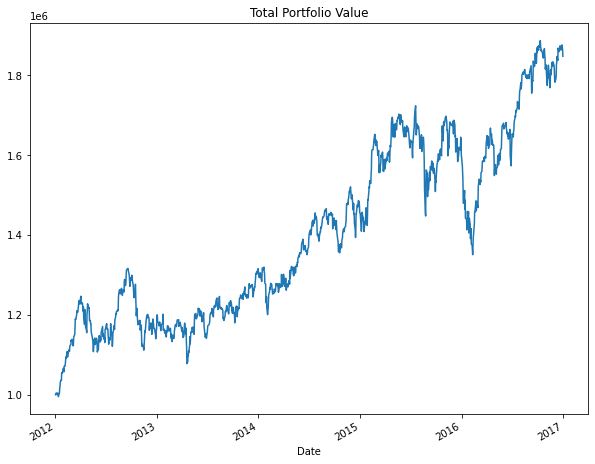

In [24]:
import matplotlib.pyplot as plt
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

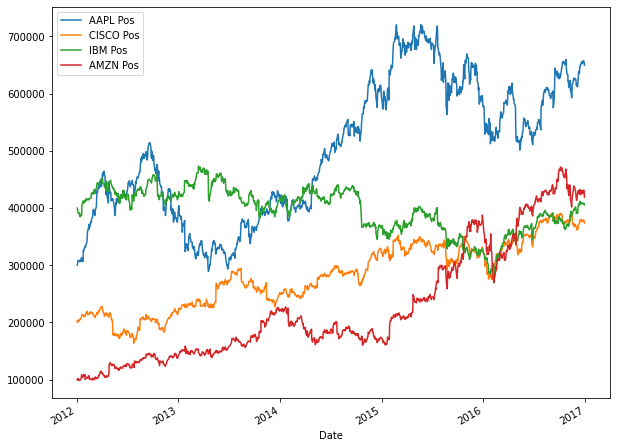

In [25]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

# Portfolio Statistics

In [26]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [27]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [28]:
print(portfolio_val['Daily Return'].mean())
print(portfolio_val['Daily Return'].std())

0.0005442330716215244
0.010568287769161718


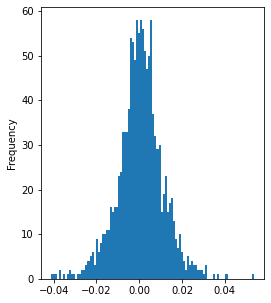

In [30]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(4,5))

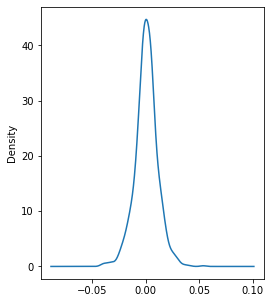

In [31]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(4,5))

In [32]:
cumulative_retrun = 100*(portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)

In [33]:
cumulative_retrun

84.74285181665545

In [34]:
# Assuming Risk Free Rate to be 0%
sr = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [35]:
sr

0.05149680662648092

In [36]:
# Multiplying sharpe ratio by sqrt(252) as there are 252 trading days in a year
asr = sr*(252**0.5)
asr

0.8174864618859096